In [18]:
%load_ext autoreload
%autoreload 2

import pickle
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import TomekLinks
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import TomekLinks

import sys
sys.path.append("../")
from src import soporte_eda_y_outliers as s_eda, soporte_encoding as s_encoding, soporte_scaling as s_scaling, soporte_logistica_preprocesamiento as sl, soporte_ajuste_logistica as sal

pd.set_option('display.max_columns', None)
import xgboost as xgb


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
df = pd.read_pickle("../datos_dfs/pickle1_stand.pkl")

In [20]:
df

,Attrition,Gender_Female,JobInvolvement_stand,PerformanceRating_stand,BusinessTravel_stand,Department_stand,DistanceFromHome_stand,Education_stand,EducationField_stand,JobLevel_stand,MaritalStatus_stand,MonthlyIncome_stand,StockOptionLevel_stand,TrainingTimesLastYear_stand,YearsWithCurrManager_stand,EnvironmentSatisfaction_iterative_stand,JobSatisfaction_iterative_stand,WorkLifeBalance_iterative_stand,NumCompaniesWorked_iterative_stand,TotalWorkingYears_iterative_stand,Gender_Male_stand,JobRole_Healthcare Representative_stand,JobRole_Human Resources_stand,JobRole_Laboratory Technician_stand,JobRole_Manager_stand,JobRole_Manufacturing Director_stand,JobRole_Research Director_stand,JobRole_Research Scientist_stand,JobRole_Sales Executive_stand,JobRole_Sales Representative_stand
0,0,1.0,0.380345,-0.423867,-0.265550,-0.369838,-0.389893,-0.887828,0.177295,-0.954482,-0.606304,1.414830,-0.936349,2.496714,-1.145828,0.258564,1.150724,-1.091659,-0.680433,-1.324097,-1.240092,3.178163,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,-0.244444
1,1,1.0,-1.023657,2.359228,1.878002,-0.134212,0.102923,-1.864946,0.177295,-0.954482,1.460527,-0.487121,0.240187,0.156234,-0.028953,0.258564,-0.677872,1.768154,-1.081468,-0.677797,-1.240092,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,2.018826,-0.531627,-0.244444
2,0,0.0,0.380345,-0.423867,1.878002,-0.134212,0.965350,1.066407,-1.503802,1.767821,-0.606304,2.738334,2.593259,-0.623926,-0.308172,-0.662833,-0.677872,-2.521566,-0.680433,-0.807057,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,1.881020,-0.244444
3,0,0.0,-1.023657,-0.423867,-1.665016,-0.134212,-0.882709,2.043524,0.177295,0.860387,-0.606304,0.393226,2.593259,1.716554,0.250265,1.179962,1.150724,0.338248,0.121636,0.227022,0.806392,-0.314647,5.354725,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,-0.244444
4,0,0.0,0.380345,-0.423867,-0.265550,-0.134212,0.102923,-1.864946,0.211928,-0.954482,1.460527,-0.880636,1.416723,-0.623926,-0.028953,1.179962,-1.592171,0.338248,0.522671,-0.290018,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,1.881020,-0.244444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,0,1.0,0.380345,-0.423867,-0.265550,-0.134212,-1.005913,-0.887828,0.211928,-0.954482,-0.826933,0.129463,0.240187,1.716554,-1.145828,-0.662833,0.236426,0.338248,-0.279399,1.778140,-1.240092,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,1.881020,-0.244444
1539,0,0.0,0.380345,-0.423867,-0.265550,-0.134212,-0.882709,0.089289,0.177295,-0.047048,-0.606304,-0.459211,-0.936349,-0.623926,-1.145828,-0.662833,1.150724,0.338248,-0.279399,-0.807057,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,4.090921
1540,0,0.0,0.380345,-0.423867,-0.265550,-0.369838,-1.005913,1.066407,-1.666218,-0.954482,-0.826933,-0.829928,2.593259,0.156234,3.042453,-0.662833,-0.677872,0.338248,2.126809,1.131840,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,2.018826,-0.531627,-0.244444
1541,0,0.0,-1.023657,-0.423867,-0.265550,-0.134212,-0.882709,0.089289,0.177295,-0.954482,-0.826933,-0.800527,0.240187,0.936394,0.808703,-1.584230,1.150724,0.338248,-0.279399,-0.290018,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,2.992464,-0.239945,-0.495337,-0.531627,-0.244444


In [ ]:
lista_categoricas = ['BusinessTravel_stand', 
                     'Department_stand', 
                     'EducationField_stand', 
                     'Gender_Male_stand',
                     "Gender_Female",
                     'JobRole_Healthcare Representative_stand',
                     'JobRole_Human Resources_stand',
                     'JobRole_Laboratory Technician_stand', 
                     'JobRole_Manager_stand',
                     'JobRole_Manufacturing Director_stand', 
                     'JobRole_Research Director_stand',
                     'JobRole_Research Scientist_stand', 
                     'JobRole_Sales Executive_stand',
                     'JobRole_Sales Representative_stand',
                     'MaritalStatus_stand']

En primer lugar, encontramos datos muy desbalanceados. Utilizaremos un SMOTENC-TOMEK

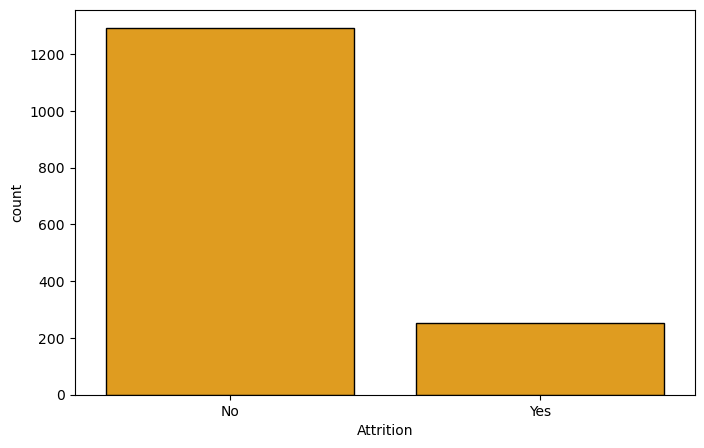

In [22]:
X = df.drop(columns=["Attrition"])  
y = df["Attrition"]  

desbalanceo = sl.Desbalanceo(dataframe = df, variable_dependiente = y)
desbalanceo.visualizar_clase()

In [23]:
df["Attrition"].unique()

array([0, 1], dtype=int64)

In [24]:
# Aplicar SMOTENC para generar muestras sintéticas
smotenc = SMOTENC(categorical_features=lista_categoricas, random_state=42)
X_res, y_res = smotenc.fit_resample(X, y)

# Aplicar Tomek Links para eliminar instancias ruidosas
tomek = TomekLinks()
X_res_tomek, y_res_tomek = tomek.fit_resample(X_res, y_res)


df_balanced = pd.concat([X_res, y_res], axis= 1)

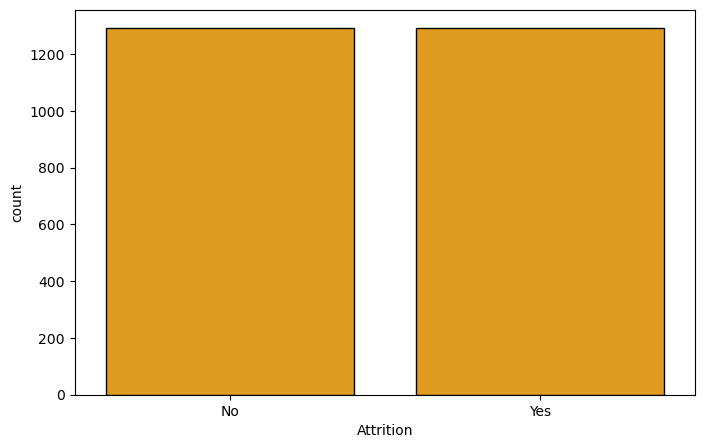

In [25]:
desbalanceo = sl.Desbalanceo(dataframe = df_balanced, variable_dependiente = y_res)
desbalanceo.visualizar_clase()

In [26]:
df_balanced

,Gender_Female,JobInvolvement_stand,PerformanceRating_stand,BusinessTravel_stand,Department_stand,DistanceFromHome_stand,Education_stand,EducationField_stand,JobLevel_stand,MaritalStatus_stand,MonthlyIncome_stand,StockOptionLevel_stand,TrainingTimesLastYear_stand,YearsWithCurrManager_stand,EnvironmentSatisfaction_iterative_stand,JobSatisfaction_iterative_stand,WorkLifeBalance_iterative_stand,NumCompaniesWorked_iterative_stand,TotalWorkingYears_iterative_stand,Gender_Male_stand,JobRole_Healthcare Representative_stand,JobRole_Human Resources_stand,JobRole_Laboratory Technician_stand,JobRole_Manager_stand,JobRole_Manufacturing Director_stand,JobRole_Research Director_stand,JobRole_Research Scientist_stand,JobRole_Sales Executive_stand,JobRole_Sales Representative_stand,Attrition
0,1.000000,0.380345,-0.423867,-0.265550,-0.369838,-0.389893,-0.887828,0.177295,-0.954482,-0.606304,1.414830,-0.936349,2.496714,-1.145828,0.258564,1.150724,-1.091659,-0.680433,-1.324097,-1.240092,3.178163,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,-0.244444,0
1,1.000000,-1.023657,2.359228,1.878002,-0.134212,0.102923,-1.864946,0.177295,-0.954482,1.460527,-0.487121,0.240187,0.156234,-0.028953,0.258564,-0.677872,1.768154,-1.081468,-0.677797,-1.240092,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,2.018826,-0.531627,-0.244444,1
2,0.000000,0.380345,-0.423867,1.878002,-0.134212,0.965350,1.066407,-1.503802,1.767821,-0.606304,2.738334,2.593259,-0.623926,-0.308172,-0.662833,-0.677872,-2.521566,-0.680433,-0.807057,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,1.881020,-0.244444,0
3,0.000000,-1.023657,-0.423867,-1.665016,-0.134212,-0.882709,2.043524,0.177295,0.860387,-0.606304,0.393226,2.593259,1.716554,0.250265,1.179962,1.150724,0.338248,0.121636,0.227022,0.806392,-0.314647,5.354725,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,-0.244444,0
4,0.000000,0.380345,-0.423867,-0.265550,-0.134212,0.102923,-1.864946,0.211928,-0.954482,1.460527,-0.880636,1.416723,-0.623926,-0.028953,1.179962,-1.592171,0.338248,0.522671,-0.290018,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,1.881020,-0.244444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,0.000000,0.380345,-0.423867,1.878002,-0.134212,-0.047353,0.089289,0.177295,-0.047048,1.460527,-0.237190,2.593259,0.156234,0.335409,0.258564,-1.194471,0.338248,-0.907027,-0.379862,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,-0.244444,1
2580,0.311115,-1.460462,2.359228,-0.265550,-0.134212,-0.157179,0.762411,0.177295,-0.672166,1.460527,-0.170860,-0.936349,-0.381207,-0.376430,0.258564,1.150724,-2.521566,0.424634,-0.700780,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,1.881020,-0.244444,1
2581,0.126677,0.380345,-0.423867,-0.265550,-0.134212,-0.959091,1.066407,0.177295,2.675256,1.460527,0.649031,-0.936349,-0.525097,-0.202060,0.025125,0.236426,0.338248,0.720498,-0.628675,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,-0.244444,1
2582,0.636291,0.380345,2.359228,-0.265550,-0.134212,-0.524226,1.066407,0.177295,0.530345,-0.606304,-0.773361,-0.508433,-0.340175,0.910257,0.007408,0.236426,-1.611729,1.106110,0.191788,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,-0.244444,1


In [27]:
ajuste = sal.AnalisisModelosClasificacion(df_balanced, "Attrition")

In [28]:
ajuste.ajustar_modelo("logistic_regression")

Hemos ajustado el modelo, vemos que tenemos métricas bastante buenas. No hay overfitting tampoco

In [29]:
df_resultados = ajuste.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados.head()

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.834059,0.837190,0.834059,0.833697,0.668193,0.910829,0.006016,NaN,NaN,NaN
test,0.833656,0.836411,0.833656,0.833221,0.666981,0.904753,NaN,NaN,0.006016,NaN


El modelo ha sido batante preciso

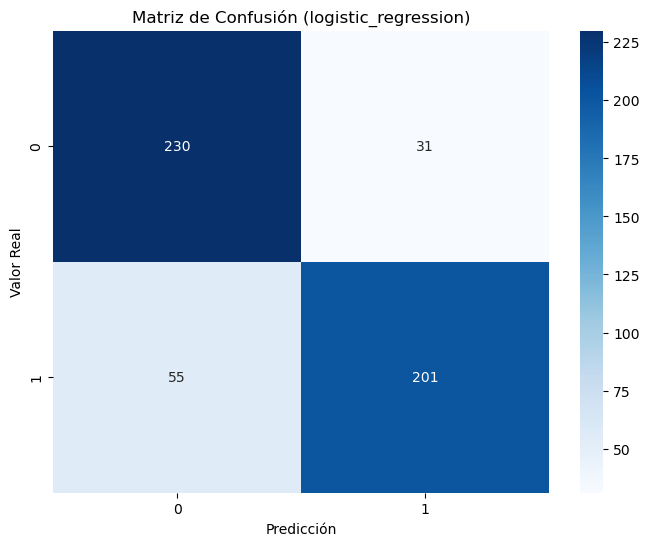

In [30]:
ajuste.plot_matriz_confusion("logistic_regression")

Todas las variables son significativas para el modelo

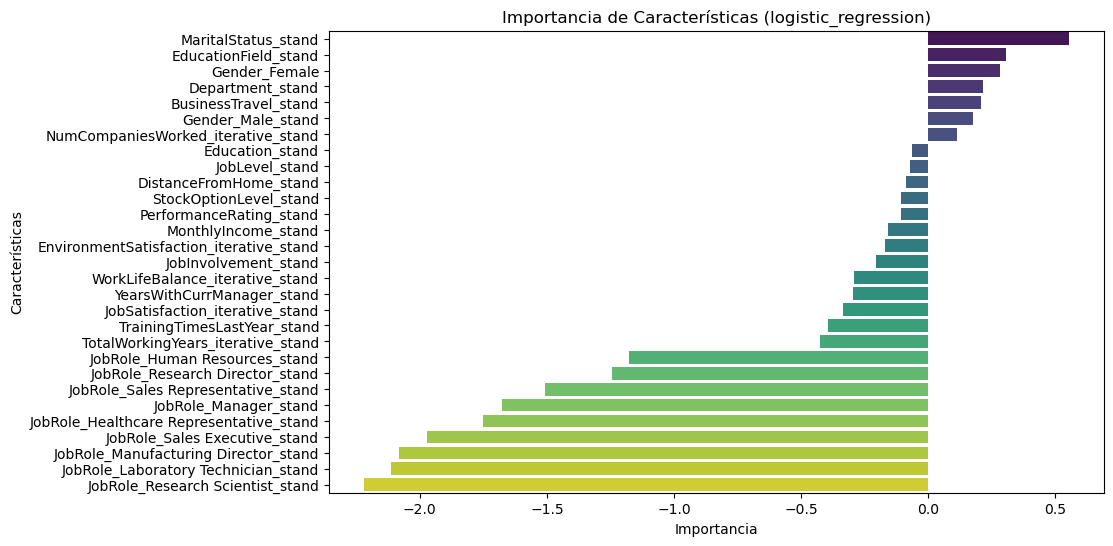

In [31]:
ajuste.importancia_predictores("logistic_regression")

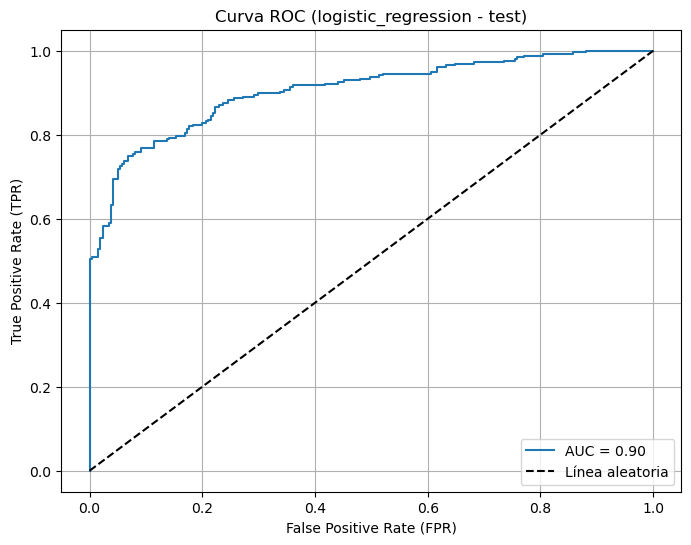

(array([0.        , 0.        , 0.        , 0.00383142, 0.00383142,
        0.01532567, 0.01532567, 0.01915709, 0.01915709, 0.02298851,
        0.02298851, 0.03448276, 0.03448276, 0.03831418, 0.03831418,
        0.04214559, 0.04214559, 0.04980843, 0.04980843, 0.05363985,
        0.05363985, 0.05747126, 0.05747126, 0.06130268, 0.06130268,
        0.06896552, 0.06896552, 0.07662835, 0.07662835, 0.08045977,
        0.08045977, 0.09195402, 0.09195402, 0.11494253, 0.11494253,
        0.13793103, 0.13793103, 0.14176245, 0.14176245, 0.1532567 ,
        0.1532567 , 0.16858238, 0.16858238, 0.17241379, 0.17241379,
        0.17624521, 0.17624521, 0.18390805, 0.18390805, 0.19923372,
        0.19923372, 0.20689655, 0.20689655, 0.21072797, 0.21072797,
        0.21455939, 0.21455939, 0.2183908 , 0.2183908 , 0.22222222,
        0.22222222, 0.22988506, 0.22988506, 0.23754789, 0.23754789,
        0.24521073, 0.24521073, 0.25670498, 0.25670498, 0.27203065,
        0.27203065, 0.29118774, 0.29118774, 0.29

In [32]:
ajuste.calcular_graficar_roc("logistic_regression")

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.960813,0.961039,0.960813,0.960807,0.921621,0.988759,0.0,16.0,NaN,NaN
test,0.777563,0.778625,0.777563,0.777438,0.555334,0.780921,NaN,NaN,0.0,16.0


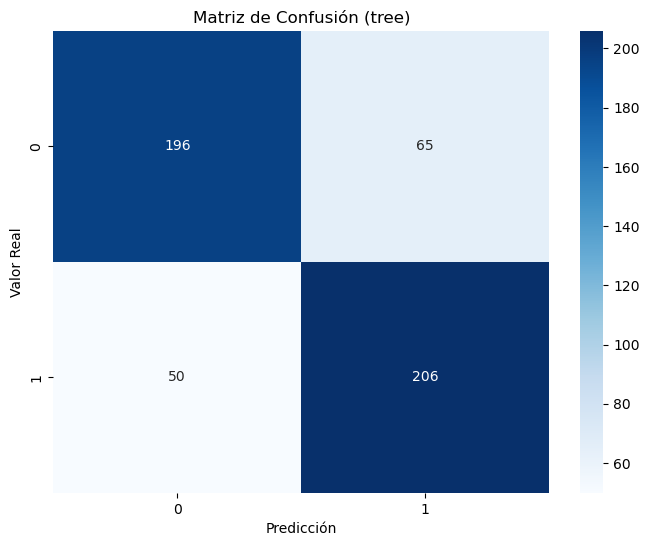

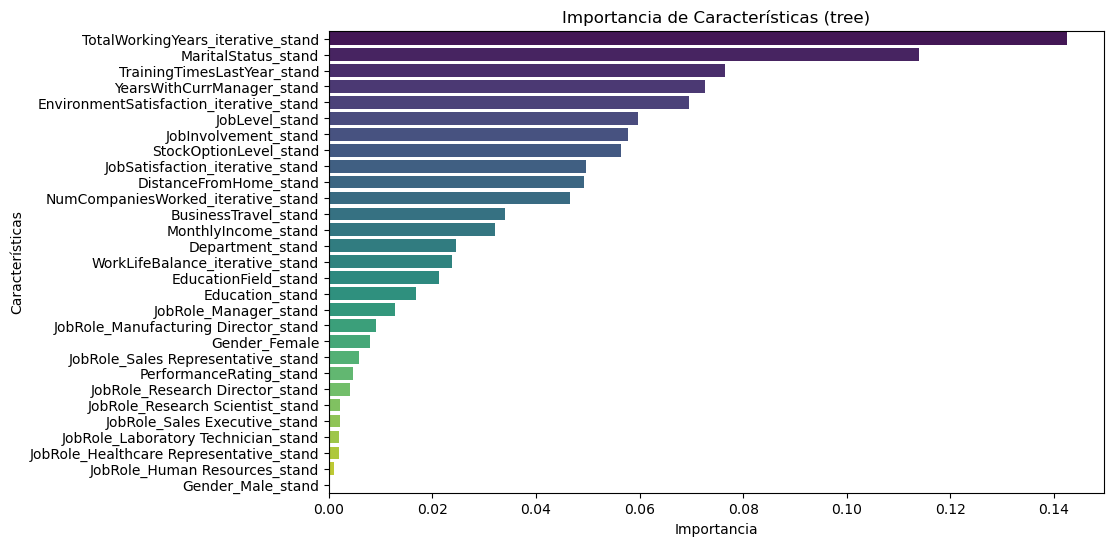

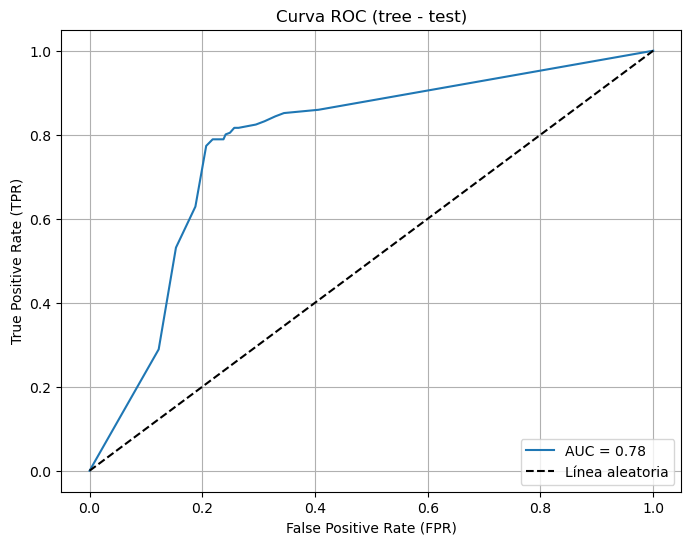

(array([0.        , 0.12260536, 0.1532567 , 0.18773946, 0.20689655,
        0.2183908 , 0.23754789, 0.24137931, 0.24904215, 0.25670498,
        0.26436782, 0.29501916, 0.31034483, 0.32950192, 0.34482759,
        0.40613027, 1.        ]),
 array([0.        , 0.2890625 , 0.53125   , 0.62890625, 0.7734375 ,
        0.7890625 , 0.7890625 , 0.80078125, 0.8046875 , 0.81640625,
        0.81640625, 0.82421875, 0.83203125, 0.84375   , 0.8515625 ,
        0.859375  , 1.        ]),
 array([       inf, 1.        , 0.96763754, 0.9375    , 0.92934783,
        0.825     , 0.77777778, 0.58333333, 0.55555556, 0.5       ,
        0.4       , 0.27586207, 0.25      , 0.18518519, 0.09090909,
        0.01886792, 0.        ]))

In [33]:
ajuste.ajustar_modelo("tree")
df_resultados = ajuste.calcular_metricas(modelo_nombre =  "tree" )
display (df_resultados.head())
ajuste.plot_matriz_confusion("tree")
ajuste.importancia_predictores("tree")
ajuste.calcular_graficar_roc("tree")

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,0.055521,NaN,NaN,NaN
test,0.911025,0.91733,0.911025,0.910629,0.82182,0.963145,NaN,NaN,0.055521,NaN


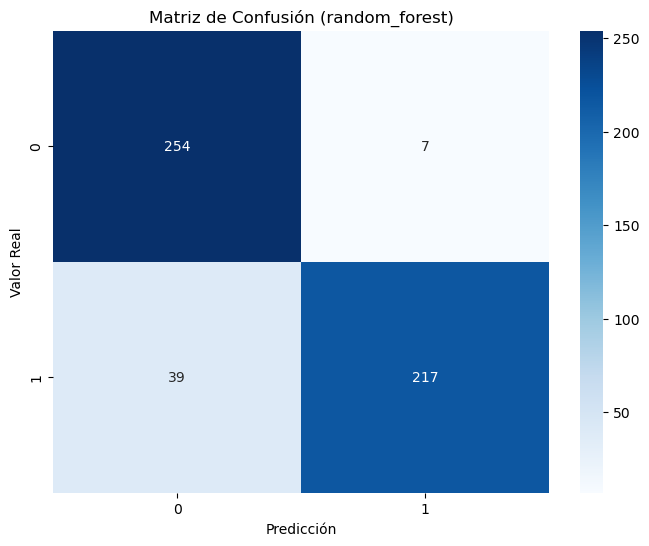

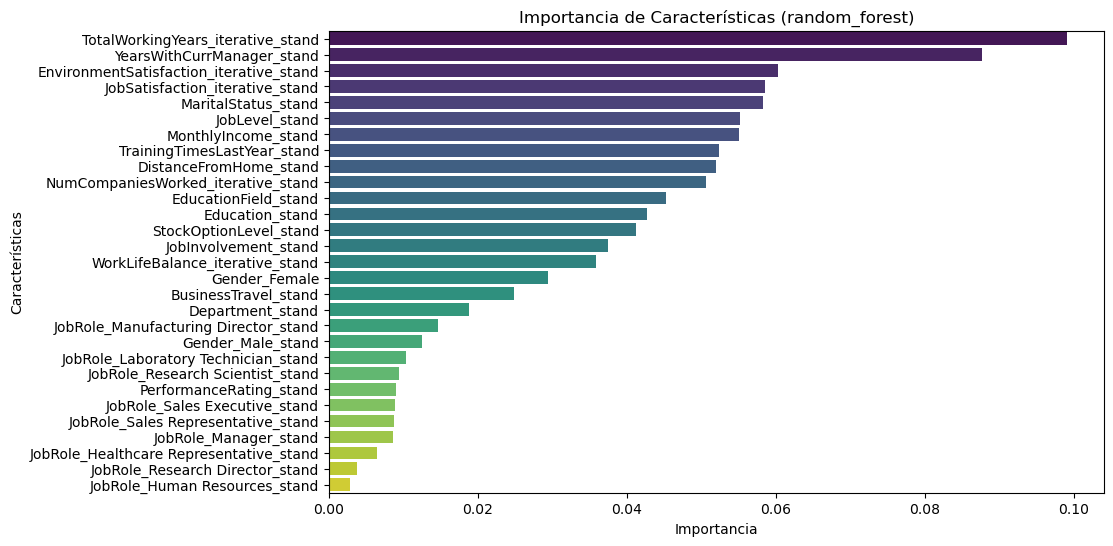

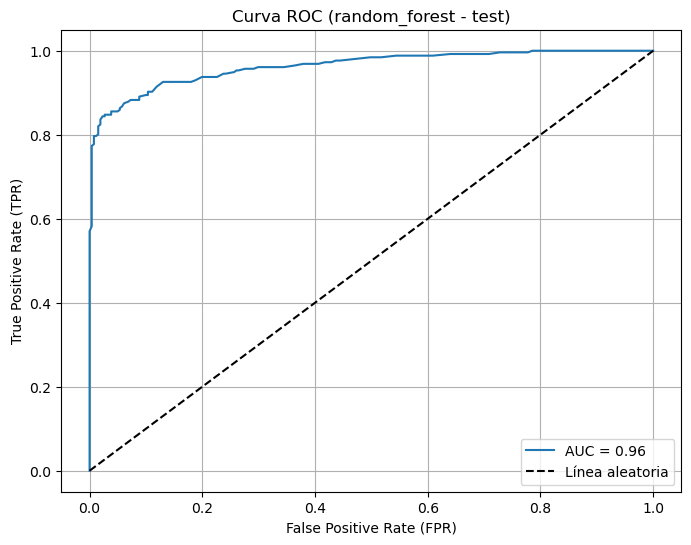

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00383142,
        0.00383142, 0.00383142, 0.00383142, 0.00383142, 0.00383142,
        0.00383142, 0.00383142, 0.00383142, 0.00383142, 0.00383142,
        0.00383142, 0.00383142, 0.00383142, 0.00383142, 0.00766284,
        0.00766284, 0.01149425, 0.01532567, 0.01532567, 0.01532567,
        0.01915709, 0.01915709, 0.01915709, 0.02298851, 0.02681992,
        0.02681992, 0.03448276, 0.03831418, 0.03831418, 0.04980843,
        0.05363985, 0.05363985, 0.05747126, 0.06130268, 0.06896552,
        0.07279693, 0.07662835, 0.08812261, 0.08812261, 0.09961686,
        0.10344828, 0.10344828, 0.11111111, 0.11

In [34]:
ajuste.ajustar_modelo("random_forest")
df_resultados = ajuste.calcular_metricas(modelo_nombre =  "random_forest" )
display (df_resultados.head())
ajuste.plot_matriz_confusion("random_forest")
ajuste.importancia_predictores("random_forest")
ajuste.calcular_graficar_roc("random_forest")

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.996613,0.996636,0.996613,0.996613,0.993227,0.999975,0.019087,NaN,NaN,NaN
test,0.911025,0.915821,0.911025,0.910716,0.821847,0.956283,NaN,NaN,0.019087,NaN


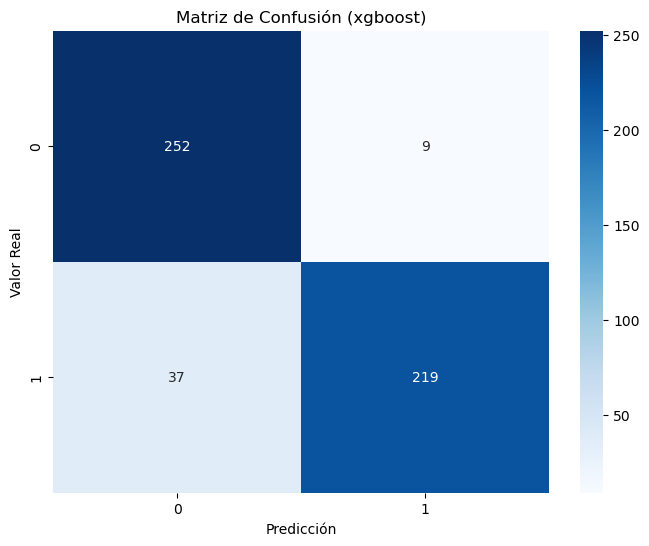

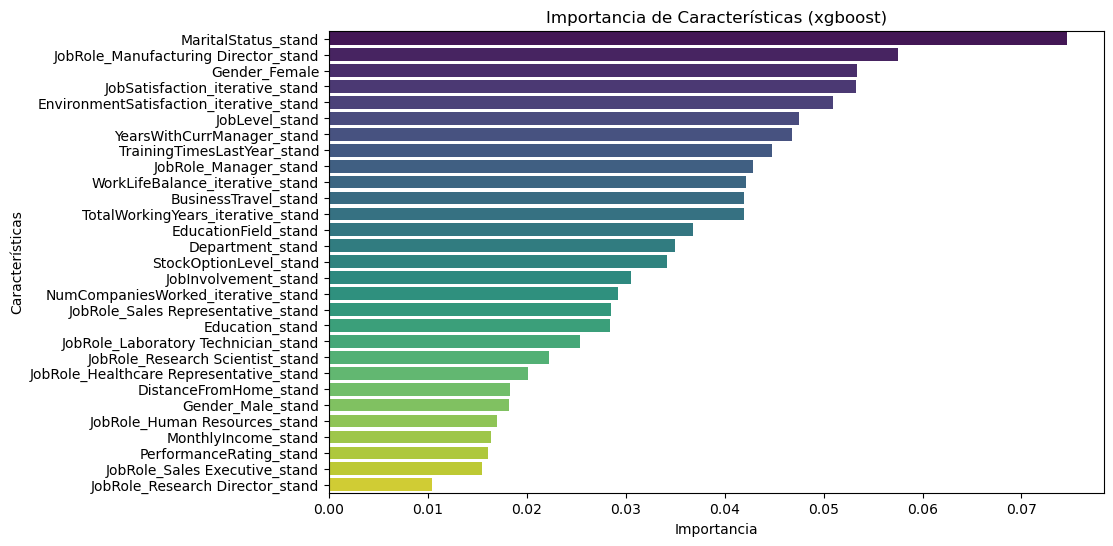

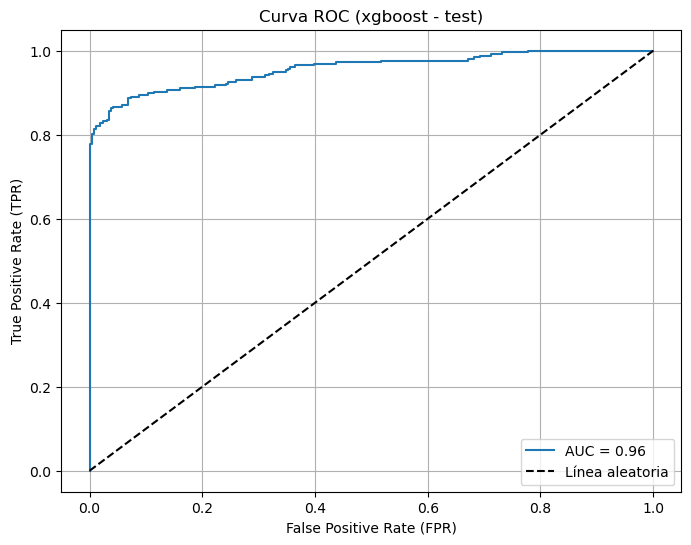

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00383142, 0.00383142, 0.00766284,
        0.00766284, 0.01149425, 0.01149425, 0.01915709, 0.01915709,
        0.02298851, 0.02298851, 0.03065134, 0.03065134, 0.03448276,
        0.03448276, 0.03831418, 0.03831418, 0.04214559, 0.04214559,
        0.05747126, 0.05747126, 0.06896552, 0.06896552, 0.07279693,
        0.07279693, 0.08812261, 0.08812261, 0.10344828, 0.10344828,
        0.11494253, 0.11494253, 0.13793103, 0.13793103, 0.16091954,
        0.16091954, 0.18773946, 0.18773946, 0.22222222, 0.22222222,
        0.24137931, 0.24137931, 0.24521073, 0.24521073, 0.2605364 ,
        0.2605364 , 0.28735632, 0.28735632, 0.31034483, 0.31034483,
        0.31800766, 0.31800766, 0.3256705 , 0.3256705 , 0.348659  ,
        0.348659  , 0.35249042, 0.35249042, 0.35632184, 0.35632184,
        0.36398467, 0.36398467, 0.39846743, 0.39846743, 0.43678161,
        0.43678161, 0.51724138, 0.51724138, 0.67

In [35]:
ajuste.ajustar_modelo("xgboost")
df_resultados = ajuste.calcular_metricas(modelo_nombre =  "xgboost" )
display (df_resultados.head())
ajuste.plot_matriz_confusion("xgboost")
ajuste.importancia_predictores("xgboost")
ajuste.calcular_graficar_roc("xgboost")

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.01343,16.0,NaN,NaN
test,0.903288,0.905648,0.903288,0.903107,0.806413,0.954128,NaN,NaN,0.01343,16.0


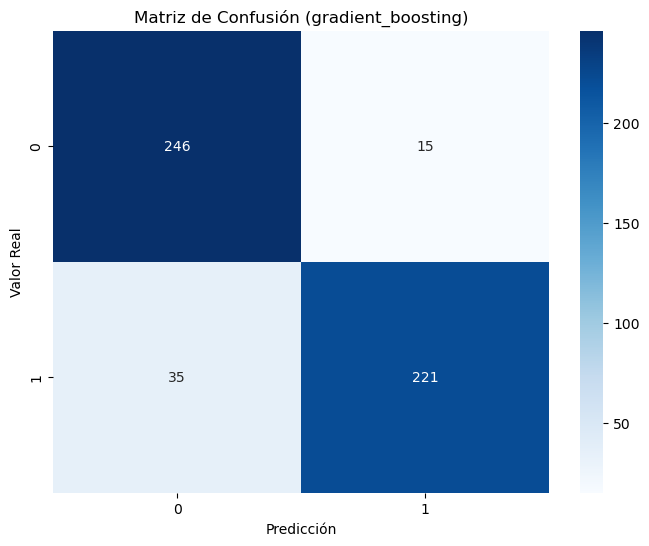

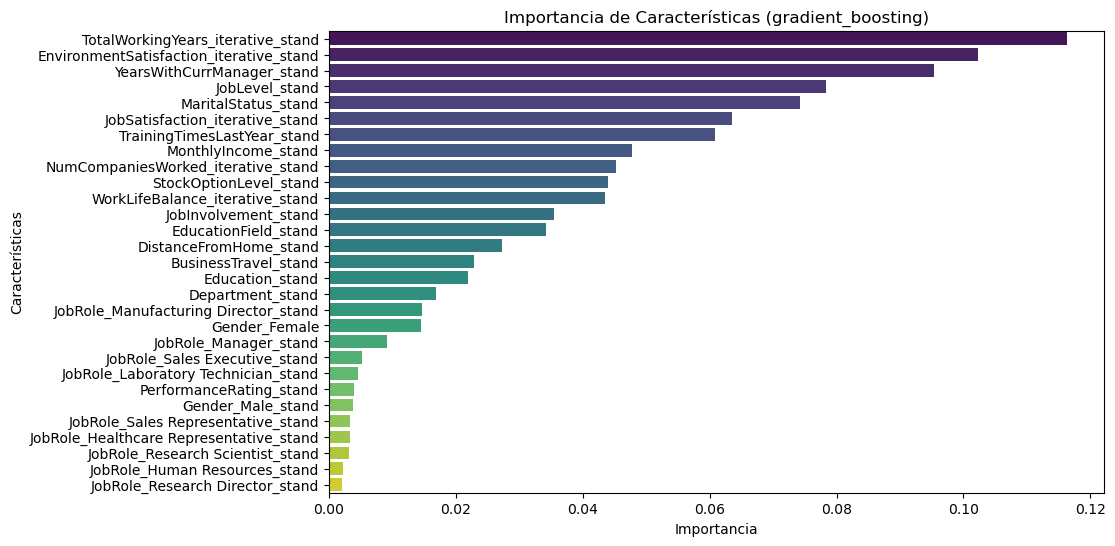

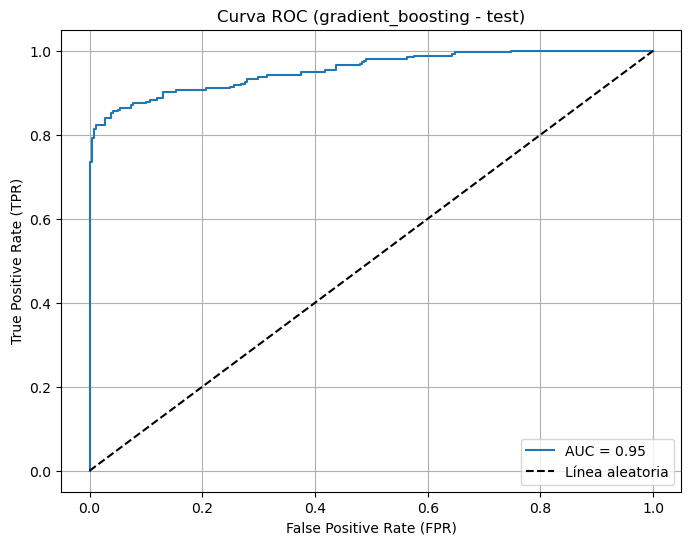

(array([0.        , 0.        , 0.        , 0.00383142, 0.00383142,
        0.00766284, 0.00766284, 0.01149425, 0.01149425, 0.02681992,
        0.02681992, 0.03831418, 0.03831418, 0.04214559, 0.04214559,
        0.04980843, 0.04980843, 0.05363985, 0.05363985, 0.07279693,
        0.07279693, 0.07662835, 0.07662835, 0.09961686, 0.09961686,
        0.10727969, 0.10727969, 0.11877395, 0.11877395, 0.1302682 ,
        0.1302682 , 0.1532567 , 0.1532567 , 0.20689655, 0.20689655,
        0.24904215, 0.24904215, 0.25670498, 0.25670498, 0.26819923,
        0.26819923, 0.27586207, 0.27586207, 0.27969349, 0.27969349,
        0.29885057, 0.29885057, 0.31417625, 0.31417625, 0.37547893,
        0.37547893, 0.41762452, 0.41762452, 0.43678161, 0.43678161,
        0.4789272 , 0.4789272 , 0.48275862, 0.48275862, 0.48659004,
        0.48659004, 0.49042146, 0.49042146, 0.56321839, 0.56321839,
        0.57471264, 0.57471264, 0.64367816, 0.64367816, 0.64750958,
        0.64750958, 0.74712644, 0.74712644, 1.  

In [36]:
ajuste.ajustar_modelo("gradient_boosting")
df_resultados = ajuste.calcular_metricas(modelo_nombre =  "gradient_boosting" )
display (df_resultados.head())
ajuste.plot_matriz_confusion("gradient_boosting")
ajuste.importancia_predictores("gradient_boosting")
ajuste.calcular_graficar_roc("gradient_boosting")